In [1]:
from diffusers import StableDiffusionInpaintPipeline
import torch


pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    # revision="fp32",
    # torch_dtype=torch.float32,
)

safety_checker/model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


In [2]:
from PIL import Image


image = Image.open("assets/friends.jpeg")

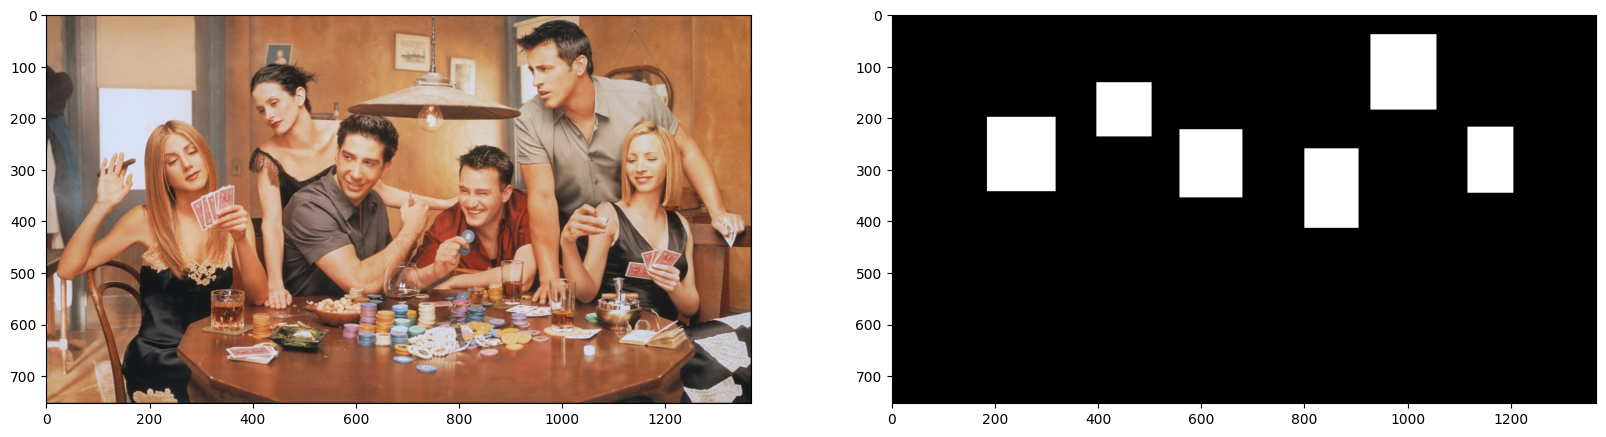

In [3]:
import numpy as np
import matplotlib.pyplot as plt


bboxes = np.array([
    [184,199, 317,343],
    [396,132, 503,237],
    [557,223, 679,355],
    [799,260, 904,414],
    [927,39, 1055,185],
    [1115,218, 1204,346],
], dtype=np.uint16) 

mask = np.zeros_like(image)
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    mask[y1:y2,x1:x2] = 255

fig, ax = plt.subplots(1,2, figsize=(20,10))
ax[0].imshow(image)
ax[1].imshow(mask)


In [4]:

#image and mask_image should be PIL images.
#The mask structure is white for inpainting and black for keeping as is
prompt = "Change the gender of the face in the image"

mask_pil = Image.fromarray(mask)

res = pipe(prompt=prompt, image=image, mask_image=mask_pil)

  0%|          | 0/50 [00:00<?, ?it/s]

In [6]:
image_final = res.images[0]
image_final.save("assets/inpainteddd.png")

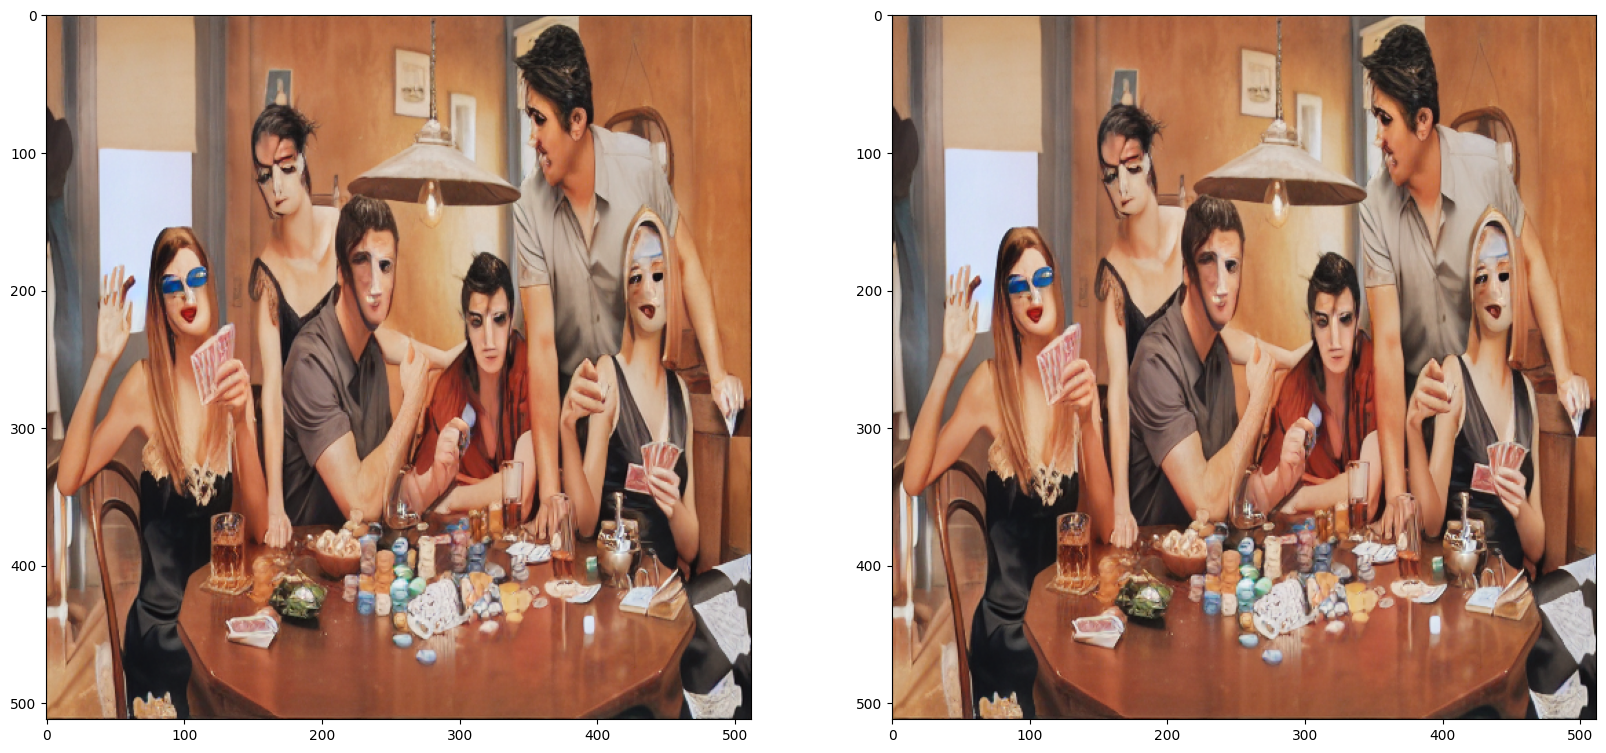

In [11]:
# compare with original

fig, ax = plt.subplots(1,2, figsize=(20,40))
ax[0].imshow(image)
ax[1].imshow(image_final)
plt.savefig('assets/friends-compare-sd-1.5.jpeg')
